## Shubhankar Kulkarni

## Student ID 013734422

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut, KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [2]:
csv1 = pd.read_csv('batch1.dat', sep='\s+', header=None, skiprows=1)
csv2 = pd.read_csv('batch2.dat', sep='\s+', header=None, skiprows=1)
csv3 = pd.read_csv('batch3.dat', sep='\s+', header=None, skiprows=1)
csv4 = pd.read_csv('batch4.dat', sep='\s+', header=None, skiprows=1)
csv5 = pd.read_csv('batch5.dat', sep='\s+', header=None, skiprows=1)
csv6 = pd.read_csv('batch6.dat', sep='\s+', header=None, skiprows=1)
csv7 = pd.read_csv('batch7.dat', sep='\s+', header=None, skiprows=1)
csv8 = pd.read_csv('batch8.dat', sep='\s+', header=None, skiprows=1)
csv9 = pd.read_csv('batch9.dat', sep='\s+', header=None, skiprows=1)
csv10 = pd.read_csv('batch10.dat', sep='\s+', header=None, skiprows=1)

## Training and Test Split

In [3]:
frames = [csv1,csv2,csv3,csv4,csv5,csv6,csv7]
training = pd.concat(frames)

frames1 = [csv10]
test = pd.concat(frames1)

In [4]:
training.shape

(9539, 129)

In [5]:
test.shape

(3599, 129)

In [6]:
X_train = training.iloc[:, 1:].values 
y_train = training.iloc[:,0].values

X_test = test.iloc[:, 1:].values 
y_test = test.iloc[:,0].values

## Feature Scaling

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest with Grid Search CV

In [10]:
warnings.simplefilter("ignore")
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
parameters = {'n_estimators': [50,100,200,300,500],'criterion': ['gini','entropy']}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy *100}')   

Best Set of HyperParameters is {'criterion': 'entropy', 'n_estimators': 50}
Accuracy of the Best Model is 90.3344166055142


## Random Forest with Cross Validation 

In [9]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf.fit(X_train, y_train)
    x = cross_val_score(estimator = rf, X = X_train, y = y_train,cv=3).mean()*100
    validation_accuracies_random_forest.append(x)
    print(f'Accuracy for {n: >{3}} trees is {np.round(x,3): >{6}}')

Accuracy for  50 trees is 90.339
Accuracy for 100 trees is 89.353
Accuracy for 200 trees is 89.259
Accuracy for 300 trees is 89.406
Accuracy for 500 trees is  89.71


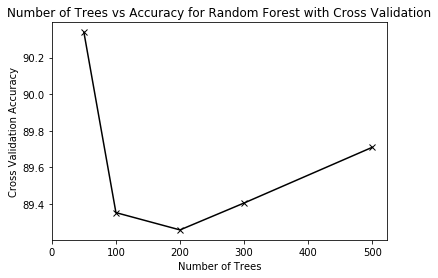

In [10]:
plt.plot(n_est,validation_accuracies_random_forest,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Cross Validation Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation')
plt.xticks(np.arange(0,600,100))
plt.show()

## Random Forest on Test Set Data

In [11]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, y_pred_rf,normalize = False)
    random_forest_accuracy_rate = random_forest_accuracy/(len(y_test)) * 100
    test_set_accuracies_random_forest.append(random_forest_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_rf,average = 'weighted')
    print(f'Number of Trees : {n: >{4}}  Precision : {np.round(precision,3):{5}} / Recall :{np.round(recall,3):{5}}/ Accuracy : {np.round(random_forest_accuracy_rate,3):{5}}') 

Number of Trees :   50  Precision : 0.638 / Recall :0.603/ Accuracy : 60.267
Number of Trees :  100  Precision : 0.652 / Recall : 0.61/ Accuracy : 61.017
Number of Trees :  200  Precision : 0.663 / Recall :0.617/ Accuracy : 61.739
Number of Trees :  300  Precision :  0.66 / Recall :0.619/ Accuracy : 61.906
Number of Trees :  500  Precision :  0.66 / Recall :0.615/ Accuracy : 61.462


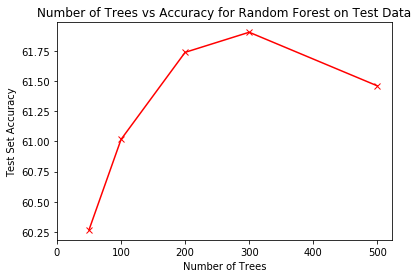

In [12]:
plt.plot(n_est,test_set_accuracies_random_forest,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest on Test Data')
plt.xticks(np.arange(0,600,100))
plt.show()

## Random Forest with PCA

In [13]:
n_components = [16,32,48,64]
for n in n_components:    
    pca = PCA(n_components = n)
    X_train_transform = pca.fit_transform(X_train)
    X_test_transform = pca.transform(X_test)
    rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
    rf.fit(X_train_transform , y_train)
    y_pred = rf.predict(X_test_transform)
    PCA_Accuracy = accuracy_score(y_test, y_pred,normalize = False)
    accuracy = PCA_Accuracy/(len(y_test))*100
    print(f'Accuracy of the Model with Principal Components {n} is {round(accuracy,3):>{5}}')

Accuracy of the Model with Principal Components 16 is 62.795
Accuracy of the Model with Principal Components 32 is 64.573
Accuracy of the Model with Principal Components 48 is 67.13
Accuracy of the Model with Principal Components 64 is 64.768


In [8]:
pca = PCA(n_components = 48)
X_train_transform_pca = pca.fit_transform(X_train)
X_test_transform_pca = pca.transform(X_test)

## Random Forest with Cross Validation and PCA

In [15]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest_pca = []
for n in n_est:
    rf_pca = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf_pca.fit(X_train_transform_pca, y_train)
    x = cross_val_score(estimator = rf_pca, X = X_train_transform_pca, y = y_train,cv=3).mean()*100
    x = np.round(x,3)
    validation_accuracies_random_forest_pca.append(x)
    print(f'Accuracy for {n: >{3}} trees is {np.round(x,3):>{5}}')

Accuracy for  50 trees is 89.006
Accuracy for 100 trees is 90.506
Accuracy for 200 trees is 91.271
Accuracy for 300 trees is 91.365
Accuracy for 500 trees is 90.999


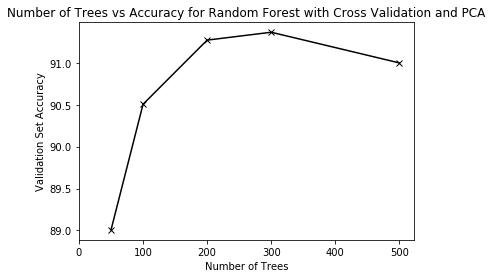

In [16]:
plt.plot(n_est,validation_accuracies_random_forest_pca,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Validation Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation and PCA')
plt.xticks(np.arange(0,600,100))
plt.show()

## Random Forest with PCA on Test Set Data

In [17]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest_pca = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train_transform_pca, y_train)
    y_pred = rf.predict(X_test_transform_pca)
    random_forest_accuracy_pca = accuracy_score(y_test, y_pred,normalize = False)
    random_forest_accuracy_rate_pca = random_forest_accuracy_pca/(len(y_test)) * 100
    test_set_accuracies_random_forest_pca.append(random_forest_accuracy_rate_pca)
    print(f'Accuracy of model with {n: >{3}} trees is {round(random_forest_accuracy_rate_pca,3):{5}}')

Accuracy of model with  50 trees is 66.574
Accuracy of model with 100 trees is 65.324
Accuracy of model with 200 trees is 66.324
Accuracy of model with 300 trees is 66.88
Accuracy of model with 500 trees is 65.49


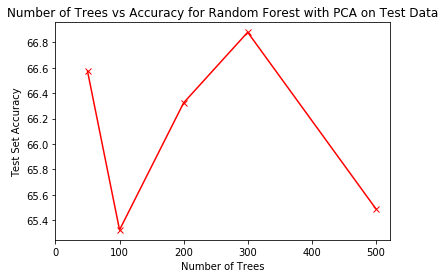

In [18]:
plt.plot(n_est,test_set_accuracies_random_forest_pca,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with PCA on Test Data')
plt.xticks(np.arange(0,600,100))
plt.show()

## SVM with Grid Search and Cross Validation

In [37]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
parameters = {'C': [1,10,50,100,500,1000], 'kernel': ['linear','rbf'],'decision_function_shape' : ['ovo','ovr'],
              'gamma' : ['scale','auto']}
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv=3)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')      
              

Best Set of HyperParameters is {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy of the Best Model is 0.9558653946954607


In [19]:
C = [1,10,50,100,500,1000]
validation_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    x = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=3).mean()*100
    validation_accuracies_svc.append(x)
    print(f'Accuracy with Penalty Parameter {i:>{4}} is {round(x,3):>{5}}') 

Accuracy with Penalty Parameter    1 is 93.451
Accuracy with Penalty Parameter   10 is 95.59
Accuracy with Penalty Parameter   50 is 93.167
Accuracy with Penalty Parameter  100 is 91.74
Accuracy with Penalty Parameter  500 is 90.587
Accuracy with Penalty Parameter 1000 is 90.65


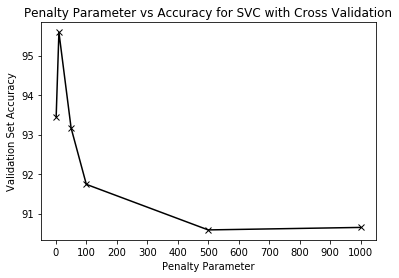

In [20]:
plt.plot(C,validation_accuracies_svc,'k-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Validation Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC with Cross Validation')
plt.xticks(np.arange(0,1100,100))
plt.show()

## SVC on Test Data

In [21]:
C = [1,10,50,100,500,1000]
test_set_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    svc_accuracy = accuracy_score(y_test, y_pred_svc,normalize = False)
    svc_accuracy_rate = svc_accuracy/(len(y_test)) * 100
    test_set_accuracies_svc.append(svc_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_svc,average = 'weighted')
    print(f'Penalty Parameter C : {i: >{4}}  Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(svc_accuracy_rate,3):>{5}}')

Penalty Parameter C :    1  Precision : 0.704 / Recall :0.652/ Accuracy : 65.24
Penalty Parameter C :   10  Precision : 0.769 / Recall :0.712/ Accuracy : 71.214
Penalty Parameter C :   50  Precision : 0.774 / Recall :  0.7/ Accuracy : 70.047
Penalty Parameter C :  100  Precision : 0.774 / Recall :0.702/ Accuracy : 70.158
Penalty Parameter C :  500  Precision : 0.763 / Recall :0.694/ Accuracy : 69.38
Penalty Parameter C : 1000  Precision : 0.764 / Recall :0.695/ Accuracy : 69.519


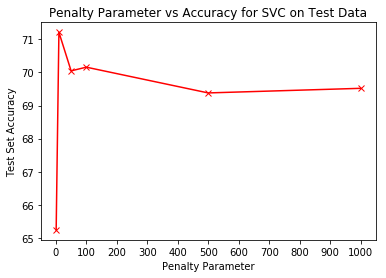

In [22]:
plt.plot(C,test_set_accuracies_svc,'r-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Test Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC on Test Data')
plt.xticks(np.arange(0,1100,100))
plt.show()

## Decision Tree Classifier with GridSearchCV

In [11]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
parameters = {'criterion': ['gini','entropy'], 'splitter': ['best','random']}
grid_search = GridSearchCV(estimator = decision_tree,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv=3)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')  

Best Set of HyperParameters is {'criterion': 'entropy', 'splitter': 'random'}
Accuracy of the Best Model is 0.8255582346157878


## Decision Tree with Cross Validation

In [12]:
decision_tree = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')
decision_tree.fit(X_train, y_train)
x = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv=3).mean()*100
print(f'Accuracy for Decision Tree Classifier is {round(x,3):>{5}}')

Accuracy for Decision Tree Classifier is 82.558


## Decison Tree on Test Data

In [13]:
y_pred_dt = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_dt,normalize = False)
decision_tree_accuracy_rate = decision_tree_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test , y_pred_dt,average = 'weighted')
print(f'Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(decision_tree_accuracy_rate,3):>{5}}')

Precision : 0.414 / Recall :0.386/ Accuracy : 38.65


## Gradient Boosting with Grid Search CV

In [42]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
# Parameters to Evaluate to find which set of hyperparameters work the best
param = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.01,0.1]
}
gs = GridSearchCV(gb,param,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
best_accuracy = gs.best_score_ 
best_parameters = gs.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')  


Best Set of HyperParameters is {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy of the Best Model is 0.9187545864346367


In [43]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
x = cross_val_score(estimator = gb, X = X_train, y = y_train,cv=3).mean()*100
print(f'Accuracy for 500 trees is {np.round(x,3):>{5}}')

Accuracy for 500 trees is 91.87927380912662


In [44]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb,normalize = False)
gb_accuracy_rate = gb_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test,y_pred_gb,average = 'weighted')
print('n_estimators : {} ------- / --- Precision : {} / Recall :{}/ Accuracy : {}'
        .format(500,np.round(precision,3),np.round(recall,3),np.round(gb_accuracy_rate,3)))

n_estimators : 500 ------- / --- Precision : 0.667 / Recall :0.597/ Accuracy : 59.739


## Ensemble Voting Classifier

In [8]:
rf_ensemble = RandomForestClassifier(n_estimators = 300,criterion = 'entropy', random_state = 0)
svc_ensemble = SVC(C = 100, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
gb_ensemble = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
log_ensemble = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
lda_ensemble = LinearDiscriminantAnalysis()
knn_ensemble = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm ='auto',p=2)

ensemble_classifier = VotingClassifier(estimators = [('Random Forest',rf_ensemble),
                                                    ('SVC',svc_ensemble),('gradient_boosting',gb_ensemble),
                                                    ('logistic',log_ensemble),('lda',lda_ensemble),
                                                    ('KNN',knn_ensemble)],voting = 'hard')
ensemble_classifier.fit(X_train,y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble,normalize = False)
ensemble_accuracy_rate = ensemble_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test , y_pred_ensemble,average = 'weighted')
print(f'Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(ensemble_accuracy_rate,3):>{5}}')

Precision : 0.774 / Recall :0.758/ Accuracy : 75.827


In [10]:
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           1       0.66      0.83      0.74       600
           2       0.74      0.78      0.76       600
           3       0.98      0.71      0.83       600
           4       0.66      0.65      0.66       599
           5       0.85      0.77      0.81       600
           6       0.75      0.80      0.78       600

   micro avg       0.76      0.76      0.76      3599
   macro avg       0.77      0.76      0.76      3599
weighted avg       0.77      0.76      0.76      3599



## Ensemble Voting Classifier with PCA

In [9]:
rf_ensemble = RandomForestClassifier(n_estimators = 300,criterion = 'entropy', random_state = 0)
svc_ensemble = SVC(C = 100, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
gb_ensemble = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
log_ensemble = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
lda_ensemble = LinearDiscriminantAnalysis()
knn_ensemble = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm ='auto',p=2)

ensemble_classifier = VotingClassifier(estimators = [('Random Forest',rf_ensemble),
                                                    ('SVC',svc_ensemble),('gradient_boosting',gb_ensemble),
                                                    ('logistic',log_ensemble),('lda',lda_ensemble),
                                                    ('KNN',knn_ensemble)],voting = 'hard')
ensemble_classifier.fit(X_train_transform_pca ,y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test_transform_pca )
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble,normalize = False)
ensemble_accuracy_rate = ensemble_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test , y_pred_ensemble,average = 'weighted')
print(f'Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(ensemble_accuracy_rate,3):>{5}}')

Precision : 0.799 / Recall :0.763/ Accuracy : 76.299
